In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import datetime
%matplotlib inline

In [5]:
def map_weekdays(ax, dates_column):
    gray,pink = "#9e9e9e","#deb8ab"
    for date in dates_column:
        ax.axvline(x=date, color=gray if date.weekday()<=4 else pink,linestyle=":")

In [6]:
# Loading Covid Tracking Project Data
covid_tracking_df = pd.read_csv("../covid-tracking-project-ny.csv")
# transform date column in datetime objects for graphing
covid_tracking_df["date"] = pd.to_datetime(covid_tracking_df["date"],format="%Y%m%d")

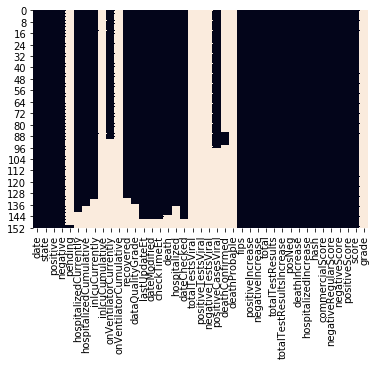

In [159]:
# Check for Null Gaps in the Data, White is a NaN Value
# xticklabels set to one show that all columns are shown, otherwise seaborn skips some
sns.heatmap(covid_tracking_df.isnull(),cbar=False, xticklabels=1)

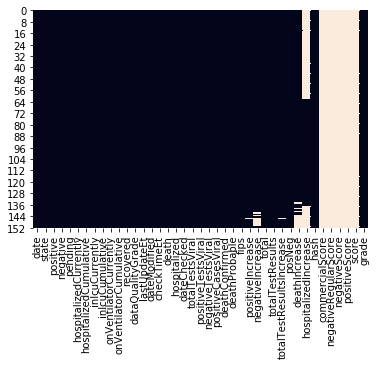

In [158]:
# check for Zero values in Data, White is a Value of 0 
sns.heatmap(covid_tracking_df==0, cbar=False, xticklabels=1)

In [173]:
# grab only necessary/useful columns from dataframe
sird = covid_tracking_df[["date","positive","negative","hospitalizedCurrently","recovered","deathIncrease"]].copy()
sird = sird.iloc[::-1] # reverse the dataframe so that dates are from earliest to latest

In [174]:
# turn every column into a cumulative count
sird_cum = sird.copy()
sird_cum["deathIncrease"] = sird_cum["deathIncrease"].cumsum()
sird_cum

,date,positive,negative,hospitalizedCurrently,recovered,deathIncrease
154,2020-03-04,6,48,NaN,NaN,0
153,2020-03-05,22,76,NaN,NaN,0
152,2020-03-06,33,92,NaN,NaN,0
151,2020-03-07,76,92,NaN,NaN,0
150,2020-03-08,105,92,NaN,NaN,0
...,...,...,...,...,...,...
4,2020-08-01,415767,5556207,581.0,73134.0,25164
3,2020-08-02,416298,5614637,556.0,73222.0,25170
2,2020-08-03,416843,5665931,536.0,73279.0,25172
1,2020-08-04,417589,5736178,568.0,73326.0,25175


In [175]:
# create a susceptible column, based on 2019 pop count from US Census Bureau
# source: https://www.census.gov/quickfacts/NY
total_pop = 19453561
sird_cum["susceptible"] = total_pop-sird_cum["positive"]
sird_cum

,date,positive,negative,hospitalizedCurrently,recovered,deathIncrease,susceptible
154,2020-03-04,6,48,NaN,NaN,0,19453555
153,2020-03-05,22,76,NaN,NaN,0,19453539
152,2020-03-06,33,92,NaN,NaN,0,19453528
151,2020-03-07,76,92,NaN,NaN,0,19453485
150,2020-03-08,105,92,NaN,NaN,0,19453456
...,...,...,...,...,...,...,...
4,2020-08-01,415767,5556207,581.0,73134.0,25164,19037794
3,2020-08-02,416298,5614637,556.0,73222.0,25170,19037263
2,2020-08-03,416843,5665931,536.0,73279.0,25172,19036718
1,2020-08-04,417589,5736178,568.0,73326.0,25175,19035972


In [176]:
# turn every column into a daily count
sird_daily = sird.copy()
sird_daily[["positive","negative","recovered"]] = sird_daily[["positive","negative","recovered"]].diff()
sird_daily = sird_daily.set_index("date")
sird_daily

,positive,negative,hospitalizedCurrently,recovered,deathIncrease
date,,,,,
2020-03-04,NaN,NaN,NaN,NaN,0
2020-03-05,16.0,28.0,NaN,NaN,0
2020-03-06,11.0,16.0,NaN,NaN,0
2020-03-07,43.0,0.0,NaN,NaN,0
2020-03-08,29.0,0.0,NaN,NaN,0
...,...,...,...,...,...
2020-08-01,753.0,81984.0,581.0,79.0,14
2020-08-02,531.0,58430.0,556.0,88.0,6
2020-08-03,545.0,51294.0,536.0,57.0,2


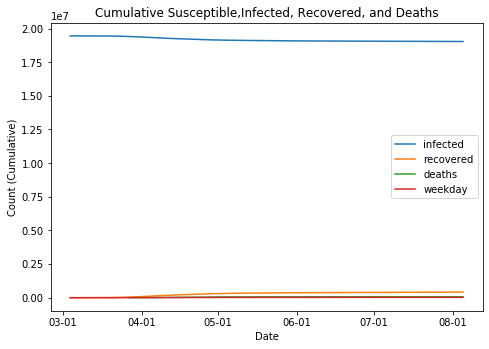

In [177]:
# plot time series of cumulative
fig = plt.figure()
ax = fig.add_axes([1,1,1,1])

# plot
dates = sird_cum["date"]
for name in ["susceptible","positive","recovered","deathIncrease"]:
    ax.plot(dates, sird_cum[name])

# mark weekends and weekdays
###map_weekdays(ax, dates)
    
# add labels and legend
ax.set_xlabel("Date")
ax.set_ylabel("Count (Cumulative)")
ax.set_title("Cumulative Susceptible,Infected, Recovered, and Deaths")
ax.legend(["infected","recovered","deaths","weekday","weekend"])
            
ax.set_yscale("linear")

# format dates
ax.xaxis.set_major_formatter(mdates.DateFormatter("%m-%d"))
ax.xaxis_date()

In [178]:
# rewrote into makeGraph function
def makeGraph(fig, ax, df, date_col, title, ylabel, col_list, yscale, show_weekdays=False):
    # plot
    dates = df[date_col]
    for name in [col_list]:
        ax.plot(dates, df[name])

    # mark weekends and weekdays
    if show_weekdays:
        map_weekdays(ax, dates)

    # add labels and legend
    ax.set_xlabel("Date")
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    ax.legend(col_list + ["weekday","weekend"] if show_weekdays else col_list)

    ax.set_yscale(yscale)

    # format dates
    ax.xaxis.set_major_formatter(mdates.DateFormatter("%m-%d"))
    ax.xaxis_date()

In [179]:
fake_susceptible = 6000
susceptible = []
fake_cases = [101,222,323,255,142,246,327,418,429,310,311,412,241,253,523]
fake_deaths = [0,0,0,0,1,1,2,3,4,6,1,2,3,4,2]

def get_recovered(case_list, death_list, recovery_pd):
    recovery_list = []
    for day, case in enumerate(case_list):
        # recovery_pd-1 represents the index at which the first assumed recovery data can be started
        # so if the recovery period is 5 days, then the first day that we can start to assume recov data is at index 4
        index = recovery_pd-1
        if type(case) != int and type(case) != float:
            recovery_list.append(None)
        elif day == index:
            cum_deaths = sum(death_list[:index+1])
            recovery_list.append(case_list[day-index] - cum_deaths)
        elif day < index:
            recovery_list.append(0)
        elif day > len(case_list) - index - 1:
            recovery_list.append(None)
        else: 
            num_recovered = case_list[day - recovery_pd]-death_list[day]
            bug_check = f"Case Value: {case_list[day - recovery_pd]} ({day-recovery_pd}), Day: {day},Death: {death_list[day]}({day})"
            recovery_list.append(num_recovered if num_recovered > -1 else bug_check)
    return recovery_list
print(get_recovered(fake_cases, fake_deaths, 4))

[0, 0, 0, 101, 100, 221, 321, 252, 138, 240, 326, 416, None, None, None]


In [180]:
getRecovered(sird_cum["positive"].diff().tolist(),sird_cum["deathIncrease"].diff().tolist(), 14)

In [181]:
covid_tracking_df

,date,state,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,...,posNeg,deathIncrease,hospitalizedIncrease,hash,commercialScore,negativeRegularScore,negativeScore,positiveScore,score,grade
0,2020-08-05,NY,418225,5808210,NaN,564.0,89995.0,134.0,NaN,69.0,...,6226435,4,0,f16995e7aabcaff873da5e93b8a73ad31635634b,0,0,0,0,0,NaN
1,2020-08-04,NY,417589,5736178,NaN,568.0,89995.0,139.0,NaN,69.0,...,6153767,3,0,84b8716ddeb6ddfb438768ef19c62856846e73f3,0,0,0,0,0,NaN
2,2020-08-03,NY,416843,5665931,NaN,536.0,89995.0,136.0,NaN,62.0,...,6082774,2,0,d34a46fc8547c1b30fcb63dc21256c4256878091,0,0,0,0,0,NaN
3,2020-08-02,NY,416298,5614637,NaN,556.0,89995.0,143.0,NaN,71.0,...,6030935,6,0,cef9e33c1f6c3908cf41497cae4b3b0f4bfe4647,0,0,0,0,0,NaN
4,2020-08-01,NY,415767,5556207,NaN,581.0,89995.0,147.0,NaN,72.0,...,5971974,14,0,13d69d7c8754f16ba59c0271c7c397a7a4f9e6b3,0,0,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,2020-03-08,NY,105,92,NaN,NaN,NaN,NaN,NaN,NaN,...,197,0,0,fa2a693c8e7c1123ce6741af19746db86f9d8fce,0,0,0,0,0,NaN
151,2020-03-07,NY,76,92,236.0,NaN,NaN,NaN,NaN,NaN,...,168,0,0,0fc0bcee0b931ade7d5379ba6ea1bbcbac513630,0,0,0,0,0,NaN
152,2020-03-06,NY,33,92,236.0,NaN,NaN,NaN,NaN,NaN,...,125,0,0,6f6a5ab226e7632b2d5bda9d6acc6cbe9e29cd7e,0,0,0,0,0,NaN
153,2020-03-05,NY,22,76,24.0,NaN,NaN,NaN,NaN,NaN,...,98,0,0,24af0f3d698331d8a3896c0f921342be3b0817c0,0,0,0,0,0,NaN


In [182]:
# attempt 2 at making it work for a regular list
def get_recovered(cases, deaths, recovery_pd):
    recoveries = []
    for index, case in enumerate(cases):
        # when index is less than recovery period, automatically add a zero
        if index < recovery_pd:
            recoveries.append(0)
        elif index == recovery_pd:
            # reference_case_count is the count of cases (recovery period) days ago
            reference_case_count = cases[index - recovery_pd]
            # on the first day recoveries are tracked, the sum of deaths up to that day are subtracted
            num_recovered = reference_case_count - sum(deaths[0:index+1])
            recoveries.append(num_recovered)
        else:
            reference_case_count = cases[index - recovery_pd]
            num_recovered = reference_case_count - deaths[index]
            recoveries.append(num_recovered)
    return recoveries

test_cases = [100,200,300,400,500,600,700,800,900]
test_deaths = [0,0,2,3,5,3,4,12,24]
test_period = 3
print(get_recovered(test_cases,test_deaths,test_period))
            

[0, 0, 0, 95, 195, 297, 396, 488, 576]


In [183]:
# rework for pandas and datetime objects
# create a test dataframe
dates = []
for day in range(1,31):
    date_object = datetime.datetime(2020,8,day)
    dates.append(date_object)
dates = np.array(dates)
test_cases = [x*100 for x in range(0,30)]
# for test deaths, assume none for 2 weeks, then 1% cases that day
test_deaths = [0]*14 + [x*0.01 for x in test_cases[14:]]
test_recovery_pd = 14

# turn lists into columns
data = np.column_stack((test_cases, test_deaths))
test_df = pd.DataFrame(data, index=dates, columns=["cases","deaths"])

# helper function that returns the difference in days between two datetime objects
def date_diff(date_present,date_past):
    date_time_difference = date_present - date_past
    difference_days = date_time_difference.total_seconds()/(3600*24)
    return difference_days
# helper function that returns the date recovery period days ago
def get_reference_date(date, recovery_pd):
    day_diff = datetime.timedelta(recovery_pd)
    return date - day_diff
# get Recovered returns a list of recovered as tuples in the format (datetimeobject, value), MUST use daily counts not cumulative
def get_recovered(cases,deaths,recovery_pd):
    starting_date = cases.index[0]
    recoveries = []
    # loops through all of the cases
    for date, val in cases.iteritems():
        diff_from_start_date = date_diff(date,starting_date)
        # assume no people recover if the minimum recovery period days have not passed
        if diff_from_start_date < recovery_pd:
            recoveries.append((date,0))
            #print(f"case 1 | d:{date} | val: {val}") # bug checking
        # if it is exactly the first day get recovered by subtracting sum up to current day
        elif diff_from_start_date == recovery_pd:
            # reference_case_count is the count of cases (recovery period) days ago
            reference_day = get_reference_date(date,recovery_pd)
            reference_case_count = cases[reference_day]
            # on the first day recoveries are tracked, the sum of deaths up to that day are subtracted
            # timedelta object used represents the duration equal to 1 day, and is used to increase index by one for slicing purposes
            sum_deaths = deaths[starting_date:date + datetime.timedelta(1)].sum()
            num_recovered = reference_case_count - sum_deaths
            recoveries.append((date,num_recovered))
            #print(f"case 2 | d:{date} | val: {val} | num_recov: {num_recovered} | d: {sum_deaths}")
        # otherwise on any regular day, take the difference from reference day case count and deaths today
        else:
            reference_day = get_reference_date(date,recovery_pd)
            reference_case_count = cases[reference_day]
            num_recovered = reference_case_count - deaths[date]
            recoveries.append((date,num_recovered))
            #print(f"case 3 | d:{date} | val: {val} | num_recov: {num_recovered}")
    return np.array(recoveries)

In [184]:
# transform np array into a dataframe
recovered_arr = get_recovered(sird_daily["positive"], sird_daily["deathIncrease"],14)
recovered_df = pd.DataFrame(recovered_arr).set_index(0).rename(columns={1:"recovered"})

In [195]:
# source code taken from stack overflow: df_1.merge(df_2, left_index=True, right_index=True, how='inner')
# trying to merged recovered with normal
sird_daily = sird_daily.merge(recovered_df, left_index=True, right_index=True, how="inner")

In [196]:
sird_daily

,positive,negative,hospitalizedCurrently,recovered_x,deathIncrease,recovered_y
date,,,,,,
2020-03-04,NaN,NaN,NaN,NaN,0,0
2020-03-05,16.0,28.0,NaN,NaN,0,0
2020-03-06,11.0,16.0,NaN,NaN,0,0
2020-03-07,43.0,0.0,NaN,NaN,0,0
2020-03-08,29.0,0.0,NaN,NaN,0,0
...,...,...,...,...,...,...
2020-08-01,753.0,81984.0,581.0,79.0,14,740
2020-08-02,531.0,58430.0,556.0,88.0,6,496
2020-08-03,545.0,51294.0,536.0,57.0,2,517


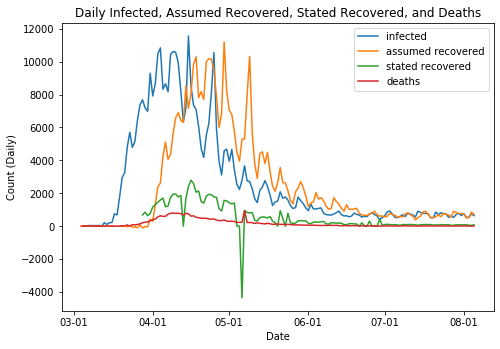

In [198]:
# plot time series of cumulative
fig = plt.figure()
ax = fig.add_axes([1,1,1,1])

# plot
dates = sird_daily.index
for name in ["positive","recovered_y","recovered_x","deathIncrease"]:
    ax.plot(dates, sird_daily[name])

# mark weekends and weekdays
###map_weekdays(ax, dates)
    
# add labels and legend
ax.set_xlabel("Date")
ax.set_ylabel("Count (Daily)")
ax.set_title("Daily Infected, Assumed Recovered, Stated Recovered, and Deaths")
ax.legend(["infected","assumed recovered","stated recovered","deaths","weekday","weekend"])
            
ax.set_yscale("linear")

# format dates
ax.xaxis.set_major_formatter(mdates.DateFormatter("%m-%d"))
ax.xaxis_date()